# Guns & Smelling like ...

I wanted to take a look at the Jupyter Notebook. I also saw a graph [More Guns, More Gun Deaths by Mona Chalabi](https://www.instagram.com/p/BWk0pE-lKcH/?taken-by=mona_chalabi&hl=en).

The data in these calculations comes from the table [List of countries by firearm-related death rate](https://en.wikipedia.org/wiki/List_of_countries_by_firearm-related_death_rate) at Wikipedia and is augmented with some socioeconomic data from the [World bank](http://data.worldbank.org). The steps used to assemble the file '[gun_toters.feather](gun_toters.feather)' is available in [Guns - Data collection & cleanup](Guns%20-%20Data%20collection%20%26%20clean-up.ipynb).

## Preliminary thoughts
A thourough explanation of the theoretical foundatioins of this study can be found [here](https://www.youtube.com/watch?v=dQw4w9WgXcQ). And with that out of the way, let's dive right in to it!

In [1]:
import feather
path = 'gun_toters.feather'
gun_toters = feather.read_dataframe(path)
gun_toters.head()

,Country,Deaths,Guns,Year,CountryCode,GDP,High-tech
0,Japan,0.06,0.6,2008.0,JPN,43603.112336,23.837842
1,"Korea, Republic of",0.08,1.1,2011.0,KOR,17870.083391,32.569983
2,Romania,0.14,0.7,2012.0,ROU,6436.917463,3.845048
3,Qatar,0.15,19.2,2004.0,QAT,62518.316634,0.009966
4,Singapore,0.16,0.5,2006.0,SGP,37790.268392,56.770908


Let's do a quick graph.

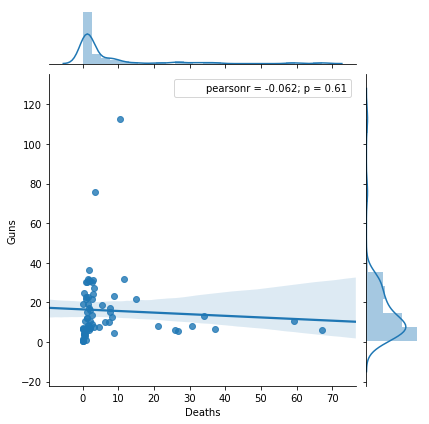

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot('Deaths','Guns', data=gun_toters, kind='reg');

So. Less guns per person leads to more deaths of guns in a society. I guess we are done.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(gun_toters[['High-tech','GDP']])
gun_toters['Cluster'] = kmeans.labels_
gun_toters.head()

,Country,Deaths,Guns,Year,CountryCode,GDP,High-tech,Cluster
0,Japan,0.06,0.6,2008.0,JPN,43603.112336,23.837842,1
1,"Korea, Republic of",0.08,1.1,2011.0,KOR,17870.083391,32.569983,0
2,Romania,0.14,0.7,2012.0,ROU,6436.917463,3.845048,0
3,Qatar,0.15,19.2,2004.0,QAT,62518.316634,0.009966,2
4,Singapore,0.16,0.5,2006.0,SGP,37790.268392,56.770908,1


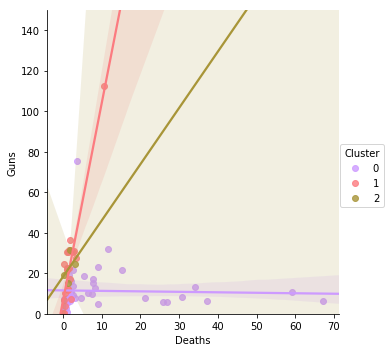

In [4]:
cluster_cmap = sns.color_palette(["#cd9aff","#fc7b80","#a89538","#679180","#588194","#8061a3","#9b4a4e"])
g = sns.lmplot('Deaths', 'Guns', data=gun_toters, hue='Cluster', palette = cluster_cmap)
g.set(ylim=(0,150))

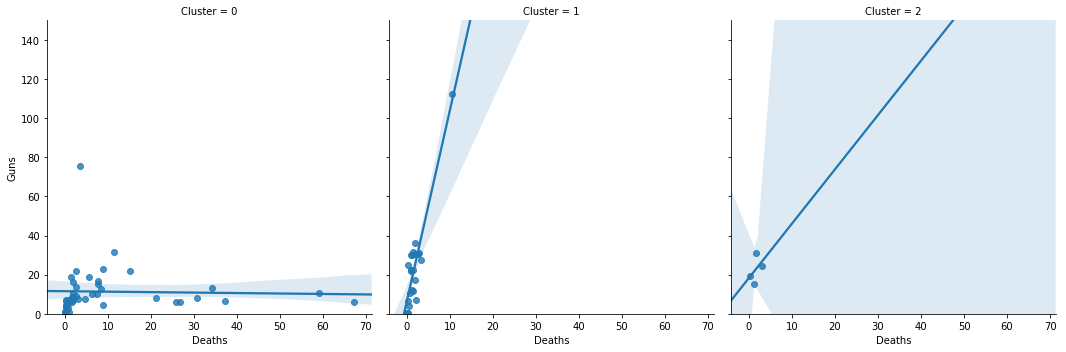

In [5]:
g = sns.lmplot('Deaths','Guns', data=gun_toters, col='Cluster', col_wrap = 3)
g.set(ylim=(0,150))

In [6]:
gun_toters[(gun_toters.Cluster == 1)]

,Country,Deaths,Guns,Year,CountryCode,GDP,High-tech,Cluster
0,Japan,0.06,0.6,2008.0,JPN,43603.112336,23.837842,1
4,Singapore,0.16,0.5,2006.0,SGP,37790.268392,56.770908,1
5,United Kingdom,0.23,6.6,2011.0,GBR,38662.972232,26.216676,1
11,Kuwait,0.36,24.8,2000.0,KWT,44619.162266,0.113221,1
13,Netherlands,0.58,3.9,2011.0,NLD,47243.345011,30.902571,1
14,Spain,0.62,10.4,2010.0,ESP,30565.676126,7.336440,1
16,Australia,0.93,21.7,2013.0,AUS,47656.826371,13.333150,1
18,Germany,1.01,30.3,2012.0,DEU,38620.519819,17.380037,1
21,New Zealand,1.07,22.6,2013.0,NZL,32768.630493,9.771893,1
23,Iceland,1.25,30.3,2012.0,ISL,40433.668825,20.550794,1


Not so brilliant ... But we do see sort of a pattern. Or three ...

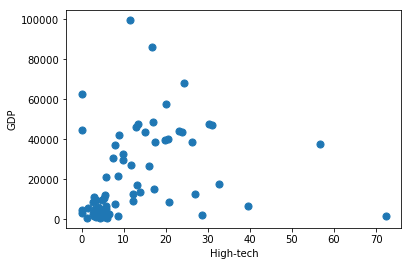

In [7]:
wb_values_ax = gun_toters.plot.scatter(x='High-tech', y='GDP', s=50)
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(gun_toters[['High-tech','GDP']])
gun_toters['Cluster'] = kmeans.labels_
gun_toters.head()

,Country,Deaths,Guns,Year,CountryCode,GDP,High-tech,Cluster
0,Japan,0.06,0.6,2008.0,JPN,43603.112336,23.837842,6
1,"Korea, Republic of",0.08,1.1,2011.0,KOR,17870.083391,32.569983,0
2,Romania,0.14,0.7,2012.0,ROU,6436.917463,3.845048,3
3,Qatar,0.15,19.2,2004.0,QAT,62518.316634,0.009966,4
4,Singapore,0.16,0.5,2006.0,SGP,37790.268392,56.770908,2


Not super helpful ... A colorised plot perhaps?

In [9]:
from matplotlib import colors
cluster_cmap = colors.ListedColormap(["#cd9aff","#fc7b80","#a89538","#679180","#588194","#8061a3","#9b4a4e"])

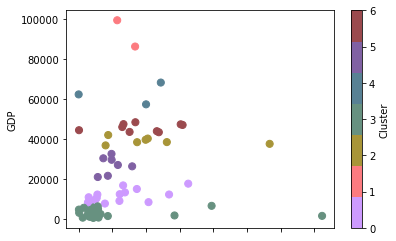

In [10]:
ax = gun_toters.plot.scatter(
    x='High-tech',
    y='GDP',
    c='Cluster',
    cmap = cluster_cmap,
    s=50)
plt.show()

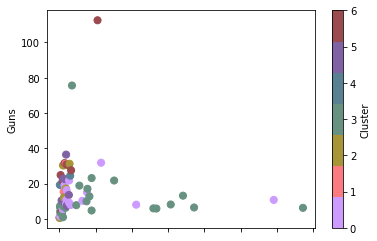

In [11]:
ax = gun_toters.plot.scatter(x='Deaths', y='Guns', c='Cluster', cmap = cluster_cmap, s=50)
plt.show()

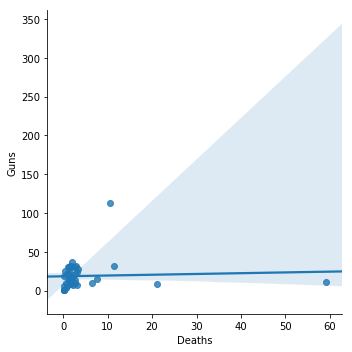

In [12]:
sns.lmplot(x='Deaths', y='Guns', data=gun_toters[gun_toters.Cluster != 3], fit_reg=True);

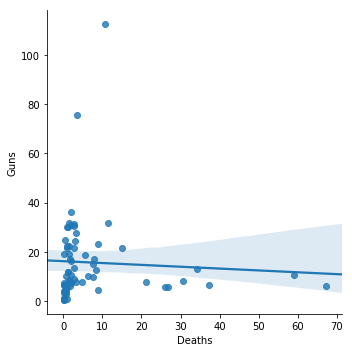

In [13]:
sns.lmplot(x='Deaths', y='Guns', data=gun_toters[(gun_toters.Cluster != 1) & (gun_toters.Country != "USA")], fit_reg=True);

Now we get to see the plot above with a socioeconomic overlay. Yey!

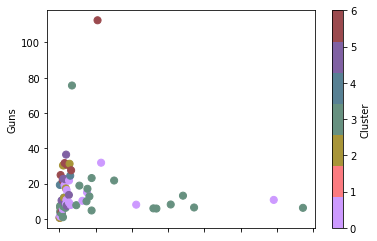

In [14]:
ax = gun_toters[gun_toters.Cluster != 1].plot.scatter(x='Deaths', y='Guns', c='Cluster', cmap = cluster_cmap, s=50)
plt.show()

For rich countries this seems very linear ...

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
rich_toters = gun_toters[gun_toters.Cluster != 1]
rich_model = lr.fit(rich_toters[['Guns']],rich_toters[['Deaths']])
rich_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr_wo_usa = LinearRegression()
rich_toters_wo_usa = gun_toters[(gun_toters.Cluster != 1) & (gun_toters.Country != 'USA')]
lr_wo_usa.fit(rich_toters_wo_usa[['Guns']],rich_toters_wo_usa[['Deaths']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
import statsmodels.api as sm
rich_model = sm.OLS(rich_toters[['Deaths']],rich_toters[['Guns']]).fit()
rich_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.926
Date:                Fri, 28 Jul 2017   Prob (F-statistic):             0.0176
Time:                        14:12:54   Log-Likelihood:                -272.18
No. Observations:                  67   AIC:                             546.4
Df Residuals:                      66   BIC:                             548.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Guns           0.1819      0.075      2.434      0.018       0.033       0.331
==============================================================================
Omnibus:                       61.802   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.845
Skew:                           2.854   Prob(JB):                     9.45e-65
Kurtosis:                      11.546   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.api as sm
rich_model_wo_usa = sm.OLS(rich_toters_wo_usa[['Deaths']],rich_toters_wo_usa[['Guns']]).fit()
rich_model_wo_usa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.926
Date:                Fri, 28 Jul 2017   Prob (F-statistic):             0.0176
Time:                        14:13:01   Log-Likelihood:                -272.18
No. Observations:                  67   AIC:                             546.4
Df Residuals:                      66   BIC:                             548.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Guns           0.1819      0.075      2.434      0.018       0.033       0.331
==============================================================================
Omnibus:                       61.802   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.845
Skew:                           2.854   Prob(JB):                     9.45e-65
Kurtosis:                      11.546   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And we take the different regressions we have created and put them into the plot.

From this we learn atleast three things.
1. The 'scikit-learn' and the 'statsmodels' linear regression methods differ.
1. In a rich country increasing the number of guns results in more deaths by guns. Who'd a thunk it?
1. The elevated death-rate in the US is higher than it should be for a wealthy country with it's shit together. But yeah ...

In [19]:
gun_toters[gun_toters.Cluster == 2]

,Country,Deaths,Guns,Year,CountryCode,GDP,High-tech,Cluster
4,Singapore,0.16,0.5,2006.0,SGP,37790.268392,56.770908,2
5,United Kingdom,0.23,6.6,2011.0,GBR,38662.972232,26.216676,2
18,Germany,1.01,30.3,2012.0,DEU,38620.519819,17.380037,2
23,Iceland,1.25,30.3,2012.0,ISL,40433.668825,20.550794,2
25,Italy,1.31,11.9,2010.0,ITA,37013.081107,8.014517,2
32,Belgium,1.82,17.2,2010.0,BEL,42198.075997,8.787607,2
44,France,2.83,31.2,2012.0,FRA,39826.236219,19.913888,2


In [20]:
gun_toters[(gun_toters.Cluster == 0) & (gun_toters.Deaths > 10)].sort_values('GDP').drop(['Year','Cluster'], axis=1)

,Country,Deaths,Guns,CountryCode,GDP,High-tech
59,Uruguay,11.52,31.8,URY,8515.755998,2.762607
61,Brazil,21.20,8.0,BRA,9238.322919,12.130622
67,"Venezuela, Bolivarian Republic of",59.13,10.7,VEN,11077.990259,2.986381


In [21]:
gun_toters[gun_toters.Cluster == 1].sort_values('GDP').drop(['Year','Cluster'], axis=1)

,Country,Deaths,Guns,CountryCode,GDP,High-tech
31,Norway,1.75,31.3,NOR,86465.847954,16.787543
22,Luxembourg,1.19,15.3,LUX,99612.567971,11.463384


Here we sort of follow the same pattern for some of the points. Could be interesting to cluster this group. Or increase the number of clusters above.

## The End ...
It would be interesting to add all violent deaths to the numbers. The yanks tend to say that their guns prevent more death than they cause and if this is the case the other rich countries should have a disproportionate number of stabbings, bludgeonings and so on. To compensate for their inability to shoot people.

Perhaps this will be added later. If I find the data.